In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from scipy.ndimage.measurements import label
import os 
import pickle 
import time
from utils.utils import *

%matplotlib inline

In [2]:
def display_image(img):
    '''Auxiliar function to plot cv2 images into jupyter notebook'''
    return convert_color(img,'BGR2RGB')

## Load pretrained classifier

In [3]:
clf, X_scaler, pca = pickle.load( open( "trained_classifier.p", "rb" ) )

/home/camilog/anaconda3/envs/Neptuno/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/camilog/anaconda3/envs/Neptuno/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Defining parameters

In [4]:
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 16 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = False # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

## Drawing searching windows in different scales

/home/camilog/anaconda3/envs/Neptuno/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


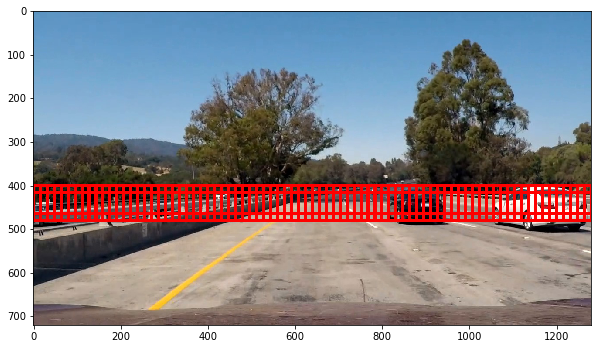

In [5]:
image = cv2.imread('./test_images/test12.jpg')

rects = []

cells_per_step = 1

ystart = 400
ystop = 464
scale = 1.0
rects.append(find_cars(image, ystart, ystop, scale, clf, X_scaler, pca, orient, pix_per_cell, cell_per_block, hist_bins, color_space, cells_per_step, True))
ystart = 416
ystop = 480
scale = 1.0
rects.append(find_cars(image, ystart, ystop, scale, clf, X_scaler, pca, orient, pix_per_cell, cell_per_block, hist_bins, color_space, cells_per_step, True))

rectangles = [item for sublist in rects for item in sublist] 
test_img_rects = draw_boxes(image, rectangles)
plt.figure(figsize=(10,10))
plt.imshow(display_image(test_img_rects))

/home/camilog/anaconda3/envs/Neptuno/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


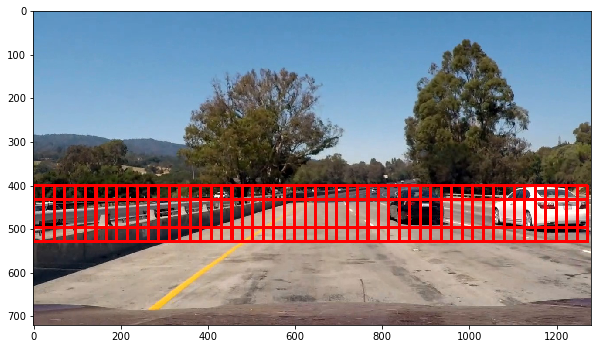

In [6]:
rects = []

ystart = 400
ystop = 496
scale = 1.5
rects.append(find_cars(image, ystart, ystop, scale, clf, X_scaler, pca, orient, pix_per_cell, cell_per_block, hist_bins, color_space, cells_per_step, True))
ystart = 432
ystop = 528
scale = 1.5
rects.append(find_cars(image, ystart, ystop, scale, clf, X_scaler, pca, orient, pix_per_cell, cell_per_block, hist_bins, color_space, cells_per_step, True))

rectangles = [item for sublist in rects for item in sublist] 
test_img_rects = draw_boxes(image, rectangles)
plt.figure(figsize=(10,10))
plt.imshow(display_image(test_img_rects))

/home/camilog/anaconda3/envs/Neptuno/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


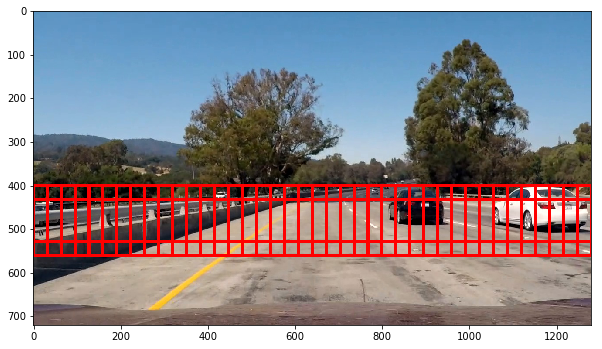

In [7]:
rects = []

ystart = 400
ystop = 528
scale = 2
rects.append(find_cars(image, ystart, ystop, scale, clf, X_scaler, pca, orient, pix_per_cell, cell_per_block, hist_bins, color_space, cells_per_step, True))
ystart = 432
ystop = 560
scale = 2
rects.append(find_cars(image, ystart, ystop, scale, clf, X_scaler, pca, orient, pix_per_cell, cell_per_block, hist_bins, color_space, cells_per_step, True))

rectangles = [item for sublist in rects for item in sublist] 
test_img_rects = draw_boxes(image, rectangles)
plt.figure(figsize=(10,10))
plt.imshow(display_image(test_img_rects))

/home/camilog/anaconda3/envs/Neptuno/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


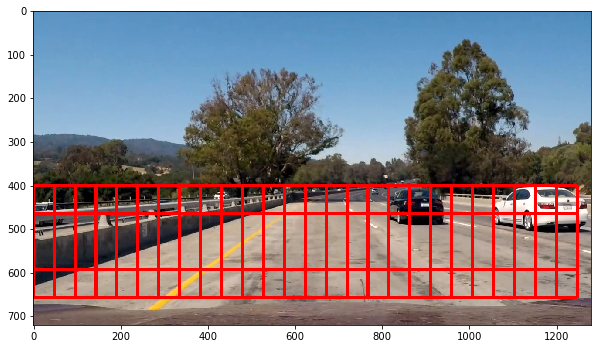

In [8]:
rects = []

ystart = 400
ystop = 596
scale = 3
rects.append(find_cars(image, ystart, ystop, scale, clf, X_scaler, pca, orient, pix_per_cell, cell_per_block, hist_bins, color_space, cells_per_step, True))
ystart = 464
ystop = 660
scale = 3
rects.append(find_cars(image, ystart, ystop, scale, clf, X_scaler, pca, orient, pix_per_cell, cell_per_block, hist_bins, color_space, cells_per_step, True))

rectangles = [item for sublist in rects for item in sublist] 
test_img_rects = draw_boxes(image, rectangles)
plt.figure(figsize=(10,10))
plt.imshow(display_image(test_img_rects))

## Detecting cars on each window

/home/camilog/anaconda3/envs/Neptuno/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


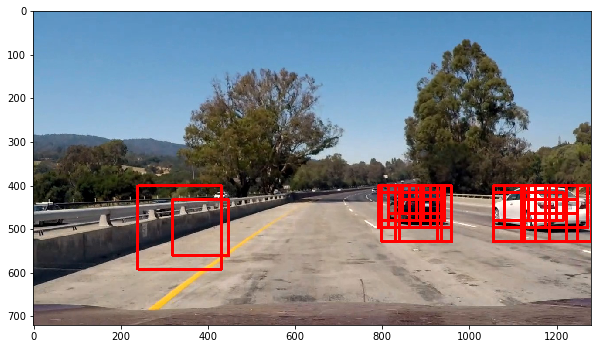

In [9]:
image = cv2.imread('./test_images/test12.jpg')

cells_per_step = 1

scales = [1,1,1.5,1.5,2,2,3,3]
y_starts = [400,416,400,432,400,432,400,464]
y_stops = [464,480,496,528,528,560,596,660]
rects = []
for i, scale in enumerate(scales):
    ystart = y_starts[i]
    ystop = y_stops[i]
    rects.append(find_cars(image, ystart, ystop, scale, clf, X_scaler, pca, orient, pix_per_cell, cell_per_block, 
                           hist_bins, color_space, cells_per_step))

windows = [item for sublist in rects for item in sublist] 
draw_image = draw_boxes(image, windows)
plt.figure(figsize=(10,10))
plt.imshow(display_image(draw_image))

## Create heatmap

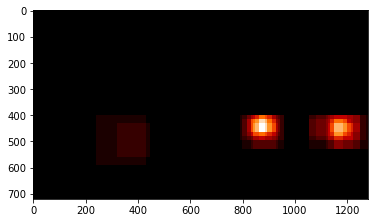

In [10]:
heat = np.zeros_like(image[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat,windows)
plt.imshow(heat, cmap='gist_heat')

## Apply threshold on heatmap and create labels

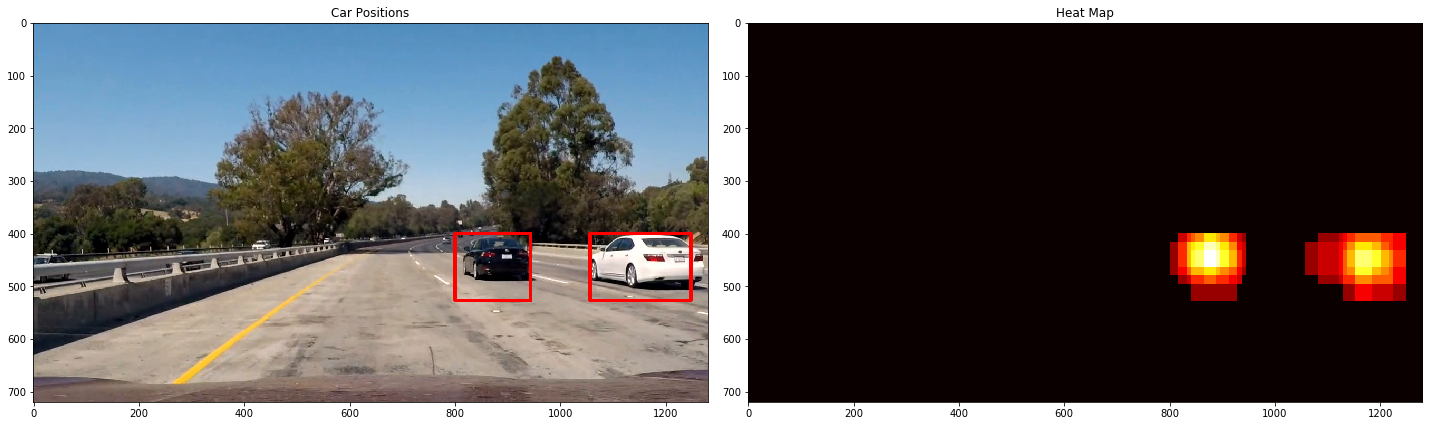

In [11]:
# Apply threshold to help remove false positives
heat = apply_threshold(heat,2)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img, _ = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(display_image(draw_img))
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

## Putting everything together

This is the same function we will use to process the video frames

In [12]:
def process_frame(img):
    rectangles = []
    
    cells_per_step = 1
    threshold = 2
    color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
    orient = 9  # HOG orientations
    pix_per_cell = 16 # HOG pixels per cell
    cell_per_block = 2 # HOG cells per block
    hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
    
    # Get hot windows
    scales = [1,1,1.5,1.5,2,2]
    y_starts = [400,416,400,432,400,432]
    y_stops = [464,480,496,528,528,560]
    rects = []
    for i, scale in enumerate(scales):
        ystart = y_starts[i]
        ystop = y_stops[i]
        rects.append(find_cars(img, ystart, ystop, scale, clf, X_scaler, pca, orient, pix_per_cell, cell_per_block, 
                               hist_bins, color_space, cells_per_step))

    windows = [item for sublist in rects for item in sublist] 
    
    heatmap_img = np.zeros_like(img[:,:,0])
    heatmap_img = add_heat(heatmap_img, windows)
    heatmap_img = apply_threshold(heatmap_img, threshold)
    labels = label(heatmap_img)
    draw_img, rects = draw_labeled_bboxes(np.copy(img), labels)
    return draw_img

/home/camilog/anaconda3/envs/Neptuno/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


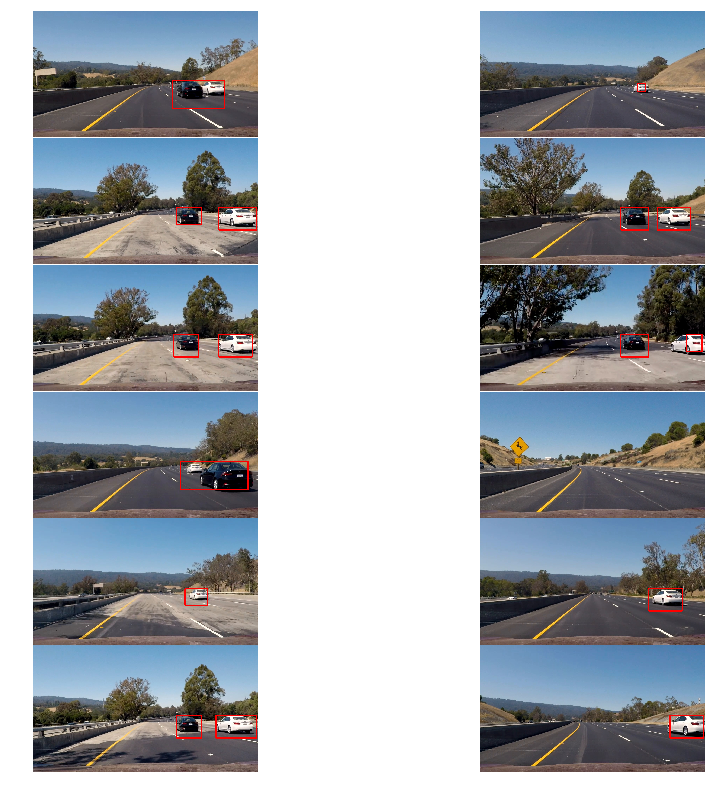

In [13]:
test_images = glob.glob('./test_images/test*.jpg')

fig, axs = plt.subplots(6, 2, figsize=(16,14))
fig.subplots_adjust(hspace = .004, wspace=.002)
axs = axs.ravel()

for i, im in enumerate(test_images):
    axs[i].imshow(display_image(process_frame(cv2.imread(im))))
    axs[i].axis('off')